In [1]:
import re
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
from networkx import nx

In [2]:
#all solutions for each variable
a_options = [-1,0,1]
c_options = [0,1]
d_options = [-1,0,1]
#b = 1
#e = 1

In [3]:
interaction_matrices = []

In [4]:
for a_option in a_options:
    a = a_option
    b = 1
    e = 1
    for d_option in d_options:
        d = d_option
        for c_option in c_options:
            c = c_option
            interaction_matrices.append([[ 0, a, 0, 0,  1 ],
                                         [-1, 0, 0, 0,  b ],
                                         [ 0, 1, c, 1, -1 ],
                                         [ d, 0, 1, 0,  0 ],
                                         [ 1,-1, 0, e,  0 ]])

In [5]:
len(interaction_matrices)

18

In [6]:
#all possible matrices
interaction_matrices

[[[0, -1, 0, 0, 1],
  [-1, 0, 0, 0, 1],
  [0, 1, 0, 1, -1],
  [-1, 0, 1, 0, 0],
  [1, -1, 0, 1, 0]],
 [[0, -1, 0, 0, 1],
  [-1, 0, 0, 0, 1],
  [0, 1, 1, 1, -1],
  [-1, 0, 1, 0, 0],
  [1, -1, 0, 1, 0]],
 [[0, -1, 0, 0, 1],
  [-1, 0, 0, 0, 1],
  [0, 1, 0, 1, -1],
  [0, 0, 1, 0, 0],
  [1, -1, 0, 1, 0]],
 [[0, -1, 0, 0, 1],
  [-1, 0, 0, 0, 1],
  [0, 1, 1, 1, -1],
  [0, 0, 1, 0, 0],
  [1, -1, 0, 1, 0]],
 [[0, -1, 0, 0, 1],
  [-1, 0, 0, 0, 1],
  [0, 1, 0, 1, -1],
  [1, 0, 1, 0, 0],
  [1, -1, 0, 1, 0]],
 [[0, -1, 0, 0, 1],
  [-1, 0, 0, 0, 1],
  [0, 1, 1, 1, -1],
  [1, 0, 1, 0, 0],
  [1, -1, 0, 1, 0]],
 [[0, 0, 0, 0, 1],
  [-1, 0, 0, 0, 1],
  [0, 1, 0, 1, -1],
  [-1, 0, 1, 0, 0],
  [1, -1, 0, 1, 0]],
 [[0, 0, 0, 0, 1],
  [-1, 0, 0, 0, 1],
  [0, 1, 1, 1, -1],
  [-1, 0, 1, 0, 0],
  [1, -1, 0, 1, 0]],
 [[0, 0, 0, 0, 1],
  [-1, 0, 0, 0, 1],
  [0, 1, 0, 1, -1],
  [0, 0, 1, 0, 0],
  [1, -1, 0, 1, 0]],
 [[0, 0, 0, 0, 1],
  [-1, 0, 0, 0, 1],
  [0, 1, 1, 1, -1],
  [0, 0, 1, 0, 0],
  [1, -1, 0, 1, 0]],


In [7]:
#obter todas os estados possiveis para o primeiro estado (s1), sem considerar restricoes
possibles_first_state = []

In [8]:
#permut elements in the list
def perm(list_to_permut):
    permuts = set(list(permutations(list_to_permut,len(list_to_permut))))
    for permut in permuts:
        possibles_first_state.append(permut)

In [9]:
all_zero = [0,0,0,0,0]
all_one = [1,1,1,1,1]
one_zero_four_one = [0,1,1,1,1]
one_one_four_zero = [1,0,0,0,0]
two_zero_three_one = [0,0,1,1,1]
two_one_three_zero = [1,1,0,0,0]
three_one_two_zero = [1,1,1,0,0]
three_zero_two_one = [0,0,0,1,1]
four_one_one_zero = [1,1,1,1,0]
four_zero_one_one = [0,0,0,0,1]

In [10]:
perm(all_zero)
perm(all_one)
perm(one_zero_four_one)
perm(one_one_four_zero)
perm(two_zero_three_one)
perm(two_one_three_zero)
perm(three_one_two_zero)
perm(three_zero_two_one)
perm(four_one_one_zero)
perm(four_zero_one_one)

In [11]:
possibles_first_state

[(0, 0, 0, 0, 0),
 (1, 1, 1, 1, 1),
 (1, 1, 1, 1, 0),
 (1, 1, 0, 1, 1),
 (1, 1, 1, 0, 1),
 (0, 1, 1, 1, 1),
 (1, 0, 1, 1, 1),
 (0, 0, 0, 1, 0),
 (0, 1, 0, 0, 0),
 (1, 0, 0, 0, 0),
 (0, 0, 0, 0, 1),
 (0, 0, 1, 0, 0),
 (1, 1, 0, 1, 0),
 (1, 1, 1, 0, 0),
 (0, 1, 0, 1, 1),
 (0, 1, 1, 0, 1),
 (1, 0, 0, 1, 1),
 (1, 0, 1, 0, 1),
 (0, 1, 1, 1, 0),
 (1, 0, 1, 1, 0),
 (0, 0, 1, 1, 1),
 (1, 1, 0, 0, 1),
 (0, 0, 1, 1, 0),
 (1, 1, 0, 0, 0),
 (0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1),
 (1, 0, 0, 1, 0),
 (0, 1, 1, 0, 0),
 (1, 0, 1, 0, 0),
 (0, 1, 0, 0, 1),
 (1, 0, 0, 0, 1),
 (1, 1, 1, 0, 0),
 (1, 1, 0, 1, 0),
 (0, 1, 1, 0, 1),
 (0, 1, 0, 1, 1),
 (1, 0, 1, 0, 1),
 (1, 0, 0, 1, 1),
 (0, 1, 1, 1, 0),
 (1, 0, 1, 1, 0),
 (0, 0, 1, 1, 1),
 (1, 1, 0, 0, 1),
 (0, 0, 1, 1, 0),
 (1, 0, 1, 0, 0),
 (1, 1, 0, 0, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1),
 (0, 1, 1, 0, 0),
 (0, 1, 0, 1, 0),
 (1, 0, 0, 1, 0),
 (0, 1, 0, 0, 1),
 (1, 0, 0, 0, 1),
 (1, 1, 1, 1, 0),
 (1, 1, 1, 0, 1),
 (1, 1, 0, 1, 1),
 (0, 1, 1,

In [12]:
#There are 32 possible states
len(possibles_first_state)

62

In [13]:
#remove duplicates
possibles_first_state = list(dict.fromkeys(possibles_first_state))
len(possibles_first_state)

32

In [14]:
#for each matrix, calc the next input for each state
#save it in a dict 
inter_matrix_next_inputs  = {}

for index in range (0, len(interaction_matrices)):
    next_input_for_each_state= {}
    for state in possibles_first_state:
        state_to_transpose = [state]
        state_transposed = np.array(state_to_transpose).T
        next_input = np.matmul(interaction_matrices[index], state_transposed)
        next_input_for_each_state[state] = next_input
    inter_matrix_next_inputs[index] = next_input_for_each_state

In [15]:
#just to validate
print (interaction_matrices[0])

[[0, -1, 0, 0, 1], [-1, 0, 0, 0, 1], [0, 1, 0, 1, -1], [-1, 0, 1, 0, 0], [1, -1, 0, 1, 0]]


In [16]:
#just to validate
for state, next_input in inter_matrix_next_inputs[0].items():
    print (state , ':', next_input)

(0, 0, 0, 0, 0) : [[0]
 [0]
 [0]
 [0]
 [0]]
(1, 1, 1, 1, 1) : [[0]
 [0]
 [1]
 [0]
 [1]]
(1, 1, 1, 1, 0) : [[-1]
 [-1]
 [ 2]
 [ 0]
 [ 1]]
(1, 1, 0, 1, 1) : [[ 0]
 [ 0]
 [ 1]
 [-1]
 [ 1]]
(1, 1, 1, 0, 1) : [[0]
 [0]
 [0]
 [0]
 [0]]
(0, 1, 1, 1, 1) : [[0]
 [1]
 [1]
 [1]
 [0]]
(1, 0, 1, 1, 1) : [[1]
 [0]
 [0]
 [0]
 [2]]
(0, 0, 0, 1, 0) : [[0]
 [0]
 [1]
 [0]
 [1]]
(0, 1, 0, 0, 0) : [[-1]
 [ 0]
 [ 1]
 [ 0]
 [-1]]
(1, 0, 0, 0, 0) : [[ 0]
 [-1]
 [ 0]
 [-1]
 [ 1]]
(0, 0, 0, 0, 1) : [[ 1]
 [ 1]
 [-1]
 [ 0]
 [ 0]]
(0, 0, 1, 0, 0) : [[0]
 [0]
 [0]
 [1]
 [0]]
(1, 1, 0, 1, 0) : [[-1]
 [-1]
 [ 2]
 [-1]
 [ 1]]
(1, 1, 1, 0, 0) : [[-1]
 [-1]
 [ 1]
 [ 0]
 [ 0]]
(0, 1, 0, 1, 1) : [[0]
 [1]
 [1]
 [0]
 [0]]
(0, 1, 1, 0, 1) : [[ 0]
 [ 1]
 [ 0]
 [ 1]
 [-1]]
(1, 0, 0, 1, 1) : [[ 1]
 [ 0]
 [ 0]
 [-1]
 [ 2]]
(1, 0, 1, 0, 1) : [[ 1]
 [ 0]
 [-1]
 [ 0]
 [ 1]]
(0, 1, 1, 1, 0) : [[-1]
 [ 0]
 [ 2]
 [ 1]
 [ 0]]
(1, 0, 1, 1, 0) : [[ 0]
 [-1]
 [ 1]
 [ 0]
 [ 2]]
(0, 0, 1, 1, 1) : [[1]
 [1]
 [0]
 [1]
 [1]]
(1, 1, 0, 0, 1) 

In [17]:
#for each matrix, calc the next state according to the following rules:
#input > 0: 1
#inpuy < 0: 0
#input == 0: keep the state

inter_matrix_next_states = {}

for index, inputs  in inter_matrix_next_inputs.items():
    next_state_for_each_state = {}
    for state, next_input in inputs.items():
        next_state= []
        for node in range (0,5):
            if next_input[node] > 0:
                next_state.append(1)
            elif next_input[node] == 0:
                next_state.append(state[node])
            else:
                next_state.append(0)
        next_state_for_each_state[state] = next_state
        
    inter_matrix_next_states [index] = next_state_for_each_state


In [18]:
#just to validate matrix[0]
for state, transition in inter_matrix_next_states[0].items():
        print (state, transition)

(0, 0, 0, 0, 0) [0, 0, 0, 0, 0]
(1, 1, 1, 1, 1) [1, 1, 1, 1, 1]
(1, 1, 1, 1, 0) [0, 0, 1, 1, 1]
(1, 1, 0, 1, 1) [1, 1, 1, 0, 1]
(1, 1, 1, 0, 1) [1, 1, 1, 0, 1]
(0, 1, 1, 1, 1) [0, 1, 1, 1, 1]
(1, 0, 1, 1, 1) [1, 0, 1, 1, 1]
(0, 0, 0, 1, 0) [0, 0, 1, 1, 1]
(0, 1, 0, 0, 0) [0, 1, 1, 0, 0]
(1, 0, 0, 0, 0) [1, 0, 0, 0, 1]
(0, 0, 0, 0, 1) [1, 1, 0, 0, 1]
(0, 0, 1, 0, 0) [0, 0, 1, 1, 0]
(1, 1, 0, 1, 0) [0, 0, 1, 0, 1]
(1, 1, 1, 0, 0) [0, 0, 1, 0, 0]
(0, 1, 0, 1, 1) [0, 1, 1, 1, 1]
(0, 1, 1, 0, 1) [0, 1, 1, 1, 0]
(1, 0, 0, 1, 1) [1, 0, 0, 0, 1]
(1, 0, 1, 0, 1) [1, 0, 0, 0, 1]
(0, 1, 1, 1, 0) [0, 1, 1, 1, 0]
(1, 0, 1, 1, 0) [1, 0, 1, 1, 1]
(0, 0, 1, 1, 1) [1, 1, 1, 1, 1]
(1, 1, 0, 0, 1) [1, 1, 0, 0, 1]
(0, 0, 1, 1, 0) [0, 0, 1, 1, 1]
(1, 1, 0, 0, 0) [0, 0, 1, 0, 0]
(0, 1, 0, 1, 0) [0, 1, 1, 1, 0]
(0, 0, 1, 0, 1) [1, 1, 0, 1, 1]
(0, 0, 0, 1, 1) [1, 1, 0, 1, 1]
(1, 0, 0, 1, 0) [1, 0, 1, 0, 1]
(0, 1, 1, 0, 0) [0, 1, 1, 1, 0]
(1, 0, 1, 0, 0) [1, 0, 1, 0, 1]
(0, 1, 0, 0, 1) [0, 1, 0, 0, 0]
(1, 0, 0

In [19]:
def stringify(something):
    if type(something) == list:
        return [stringify(x) for x in something]
    elif type(something) == tuple:
        return tuple(stringify(list(something)))
    else:
        return str(something)

In [20]:
inter_matrix_transitions = {}

for index, next_state_for_each_state in inter_matrix_next_states.items():  
    transitions = []
    
    for state, next_state in next_state_for_each_state.items():
        transition = []
        state_str = ''.join(stringify(state))
        transition.append(state_str)
        next_state_str = ''.join(stringify(next_state))
        transition.append(next_state_str)
        
        transitions.append(transition)

        inter_matrix_transitions[index] = transitions;

In [21]:
#just to validate matrix[0]
for state, transition in inter_matrix_next_states[0].items():
        print (state, transition)

(0, 0, 0, 0, 0) [0, 0, 0, 0, 0]
(1, 1, 1, 1, 1) [1, 1, 1, 1, 1]
(1, 1, 1, 1, 0) [0, 0, 1, 1, 1]
(1, 1, 0, 1, 1) [1, 1, 1, 0, 1]
(1, 1, 1, 0, 1) [1, 1, 1, 0, 1]
(0, 1, 1, 1, 1) [0, 1, 1, 1, 1]
(1, 0, 1, 1, 1) [1, 0, 1, 1, 1]
(0, 0, 0, 1, 0) [0, 0, 1, 1, 1]
(0, 1, 0, 0, 0) [0, 1, 1, 0, 0]
(1, 0, 0, 0, 0) [1, 0, 0, 0, 1]
(0, 0, 0, 0, 1) [1, 1, 0, 0, 1]
(0, 0, 1, 0, 0) [0, 0, 1, 1, 0]
(1, 1, 0, 1, 0) [0, 0, 1, 0, 1]
(1, 1, 1, 0, 0) [0, 0, 1, 0, 0]
(0, 1, 0, 1, 1) [0, 1, 1, 1, 1]
(0, 1, 1, 0, 1) [0, 1, 1, 1, 0]
(1, 0, 0, 1, 1) [1, 0, 0, 0, 1]
(1, 0, 1, 0, 1) [1, 0, 0, 0, 1]
(0, 1, 1, 1, 0) [0, 1, 1, 1, 0]
(1, 0, 1, 1, 0) [1, 0, 1, 1, 1]
(0, 0, 1, 1, 1) [1, 1, 1, 1, 1]
(1, 1, 0, 0, 1) [1, 1, 0, 0, 1]
(0, 0, 1, 1, 0) [0, 0, 1, 1, 1]
(1, 1, 0, 0, 0) [0, 0, 1, 0, 0]
(0, 1, 0, 1, 0) [0, 1, 1, 1, 0]
(0, 0, 1, 0, 1) [1, 1, 0, 1, 1]
(0, 0, 0, 1, 1) [1, 1, 0, 1, 1]
(1, 0, 0, 1, 0) [1, 0, 1, 0, 1]
(0, 1, 1, 0, 0) [0, 1, 1, 1, 0]
(1, 0, 1, 0, 0) [1, 0, 1, 0, 1]
(0, 1, 0, 0, 1) [0, 1, 0, 0, 0]
(1, 0, 0

0


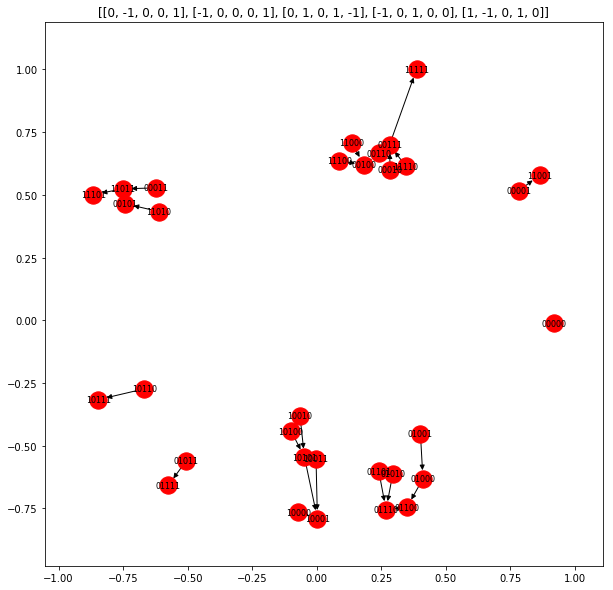

1


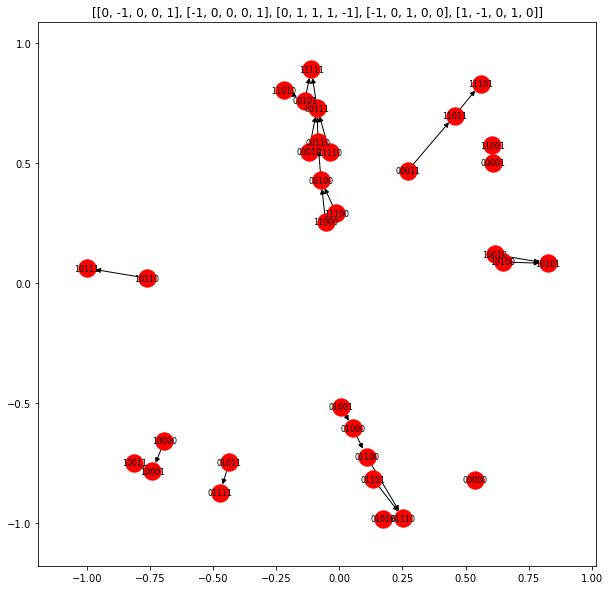

2


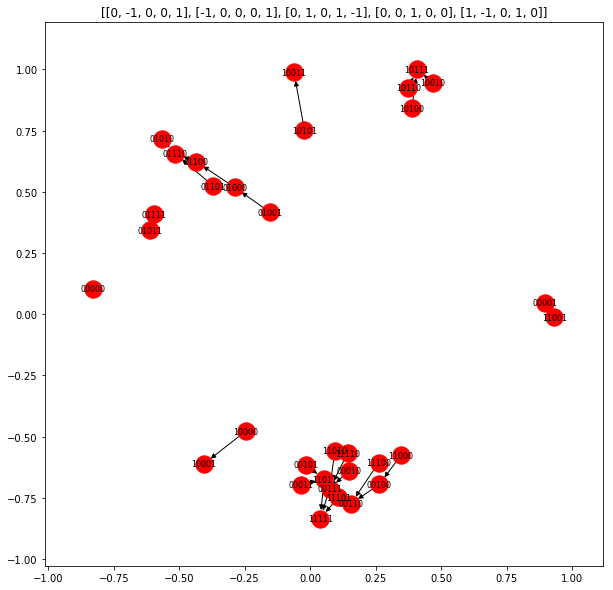

3


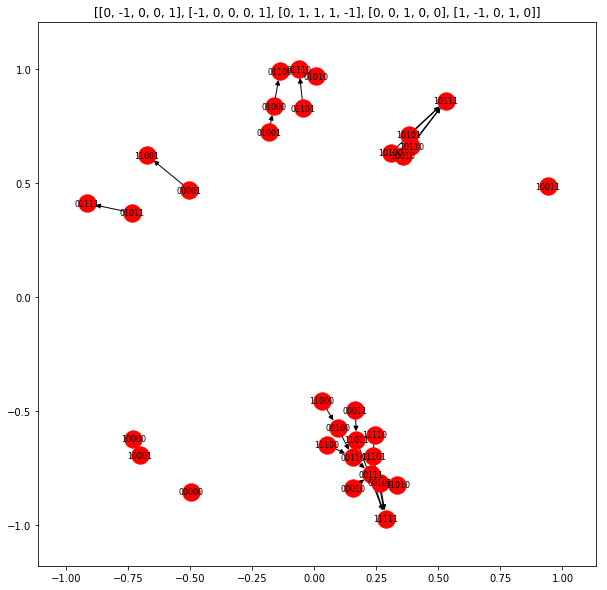

4


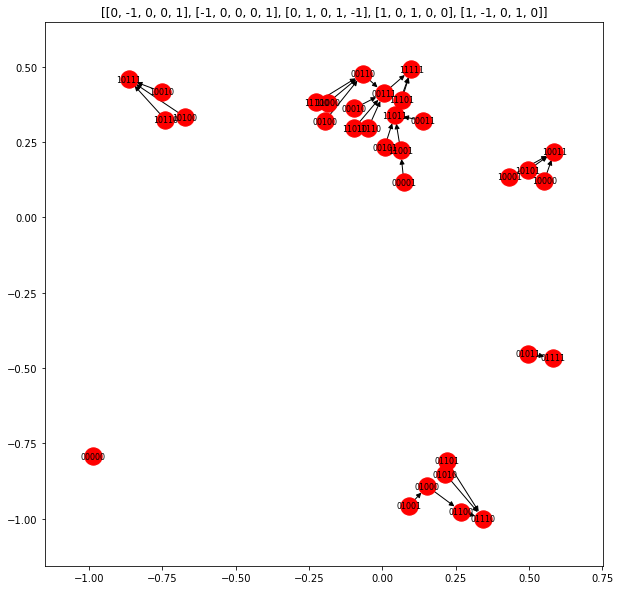

5


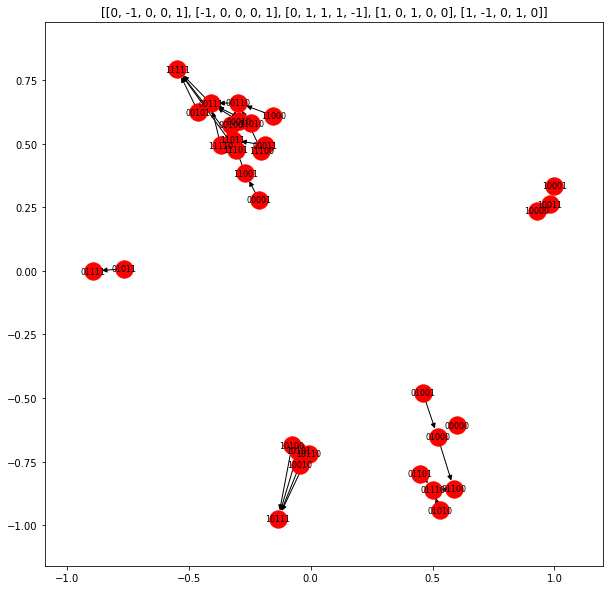

6


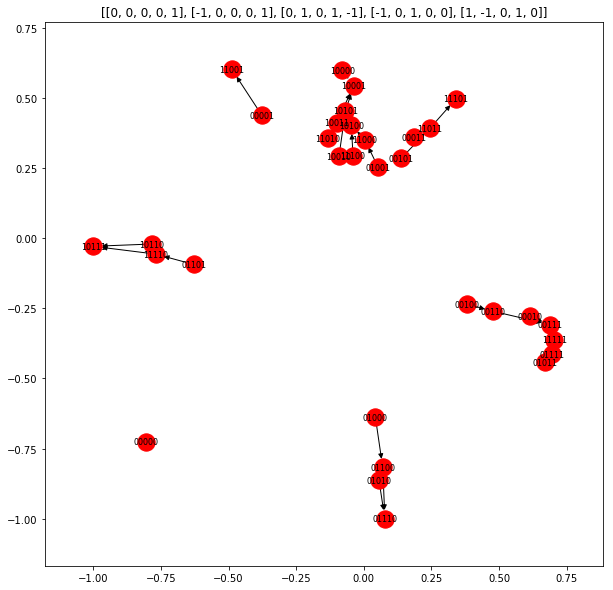

7


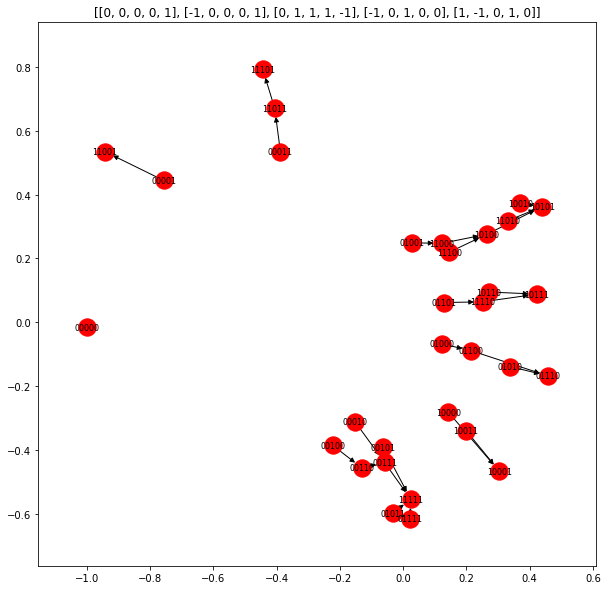

8


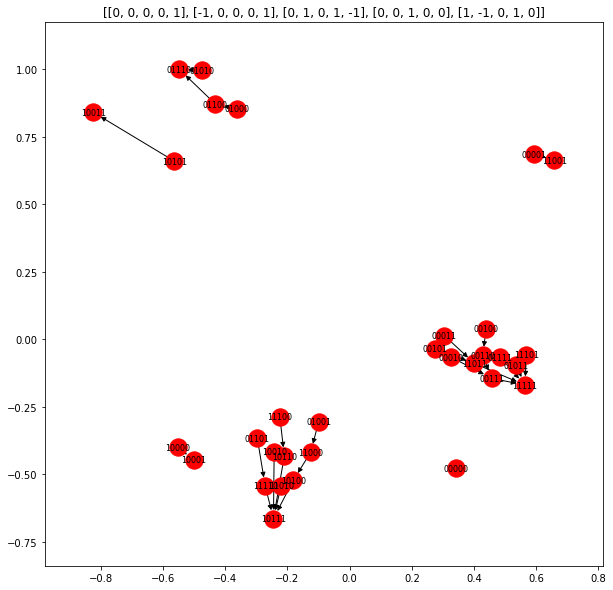

9


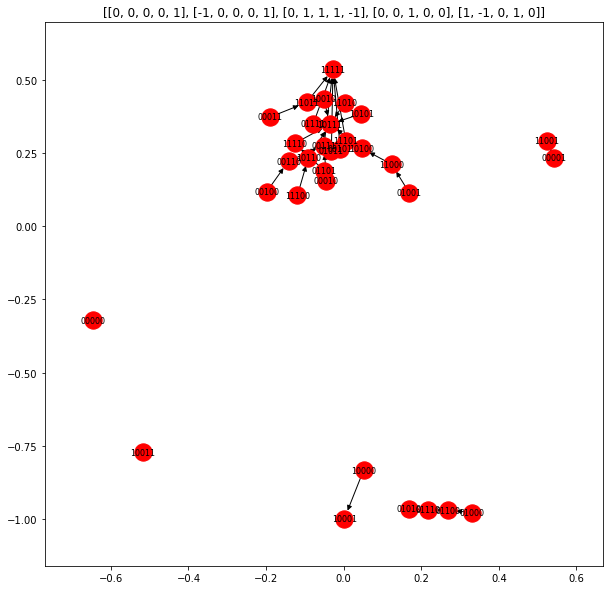

10


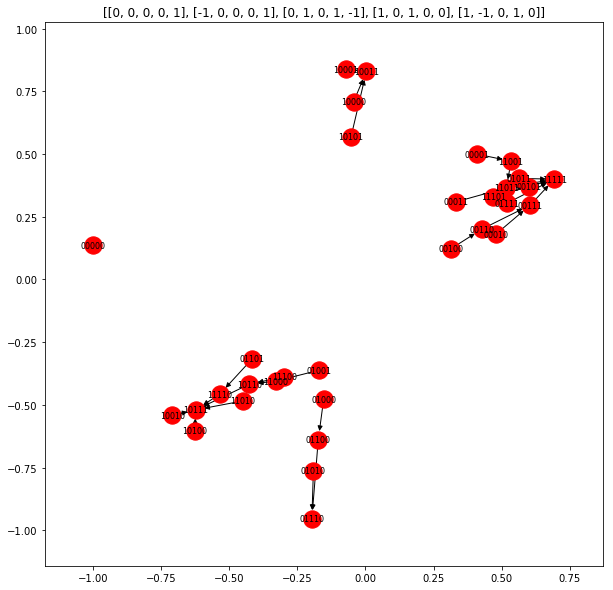

11


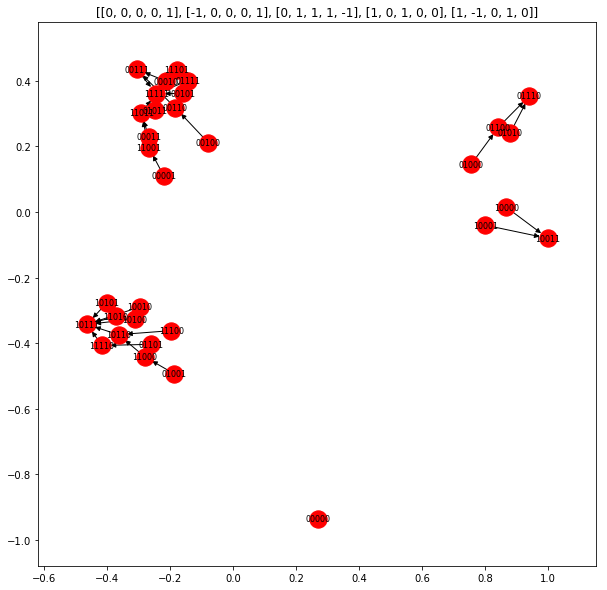

12


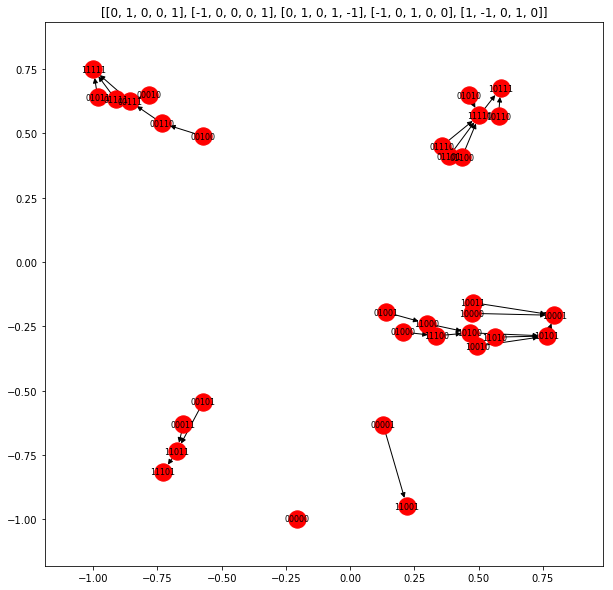

13


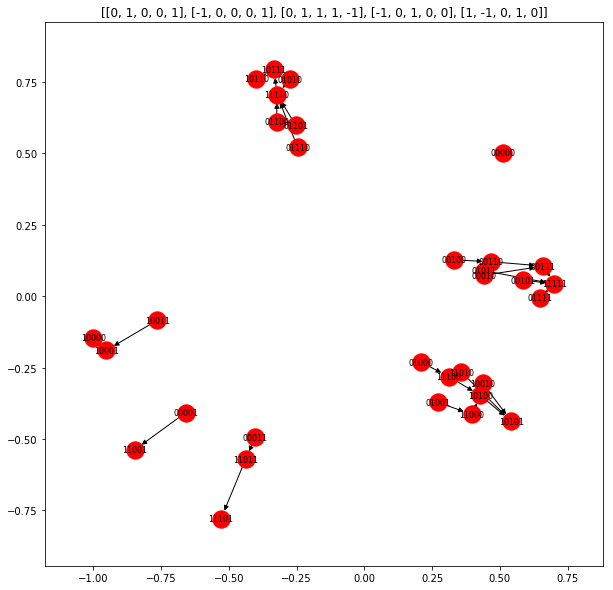

14


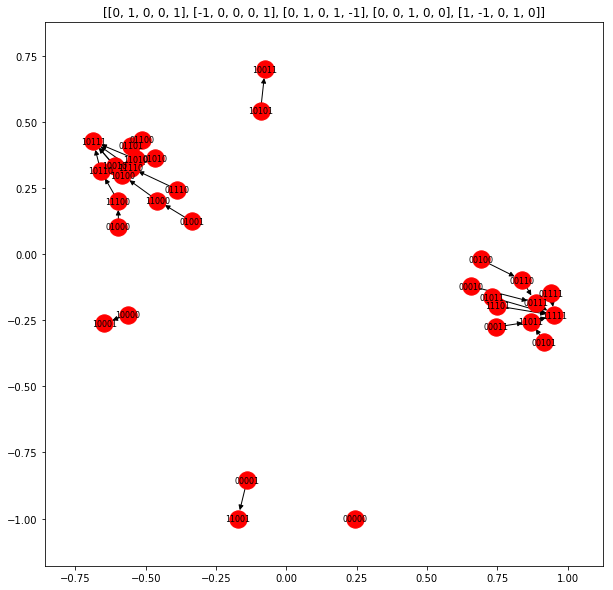

15


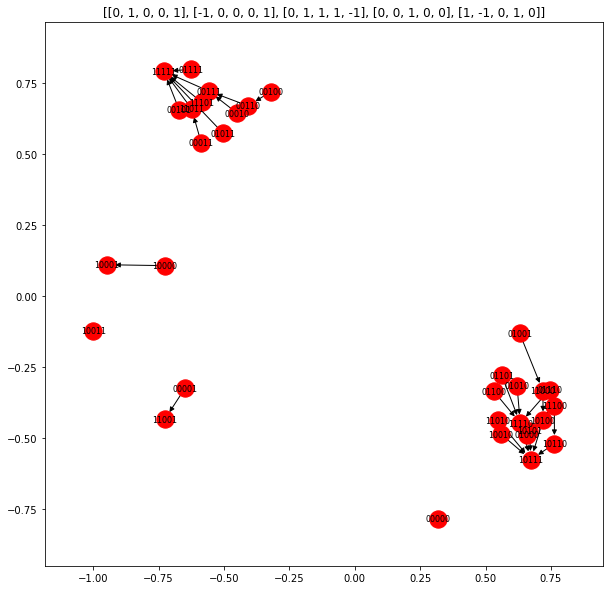

16


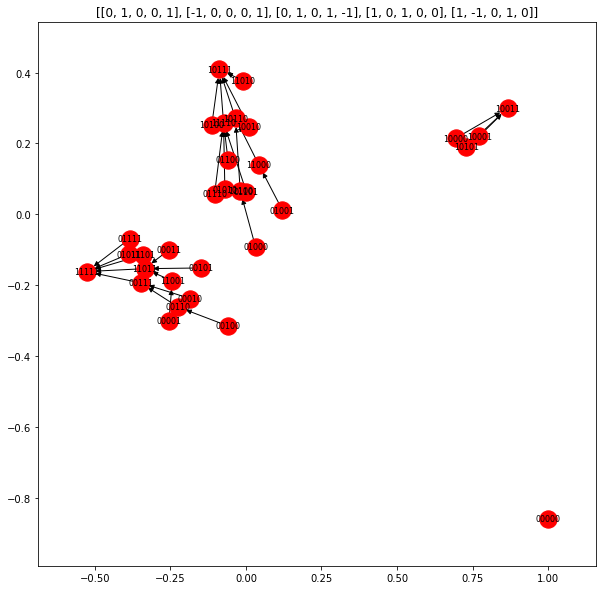

17


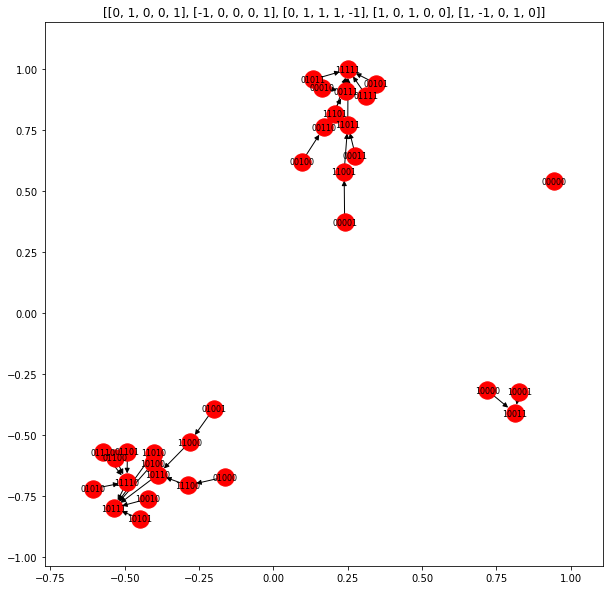

In [25]:
#transition state diagram for each matrix
for index, transitions  in inter_matrix_transitions.items():  
    print(index)
    G = nx.DiGraph()
    G.add_edges_from(transitions)

    pos = nx.spring_layout(G)
    plt.figure(3,figsize=(10,10)) 
    plt.title(interaction_matrices[index])
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos,font_size=8)
    nx.draw_networkx_edges(G, pos, arrows=True)
    plt.show()